In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Customer Churn.csv')
data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


In [3]:
data.shape

(3150, 16)

In [4]:
X = data.drop(columns=['Churn'])
y = data['Churn']

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [7]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [8]:
pca.explained_variance_ratio_

array([3.46752691e-01, 1.90280946e-01, 1.22395375e-01, 8.41708549e-02,
       7.93926397e-02, 5.75367964e-02, 3.84842648e-02, 3.29202785e-02,
       2.47868576e-02, 1.76313171e-02, 2.43769475e-03, 2.20566832e-03,
       9.35310611e-04, 6.93059253e-05, 0.00000000e+00])

In [9]:
pca.explained_variance_ratio_.cumsum()

array([0.34675269, 0.53703364, 0.65942901, 0.74359987, 0.82299251,
       0.8805293 , 0.91901357, 0.95193385, 0.9767207 , 0.99435202,
       0.99678972, 0.99899538, 0.99993069, 1.        , 1.        ])

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
X_pca.shape

(3150, 2)

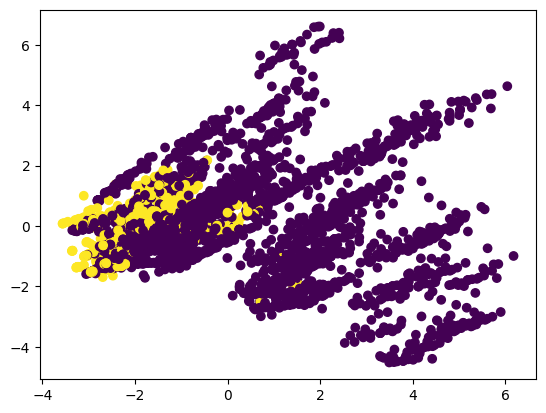

In [25]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)

In [21]:
tsne = TSNE(n_components=2, perplexity=40)
X_tsne = tsne.fit_transform(X_scaled)

In [22]:
tsne.kl_divergence_

0.2869899272918701

In [23]:
X_tsne.shape

(3150, 2)

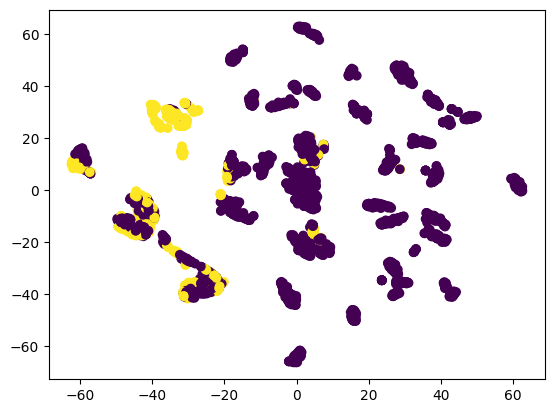

In [24]:
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y)